In [251]:
import nlif
import numpy as np
import matplotlib.pyplot as plt
import nengo

In [887]:
with nlif.Neuron() as three_comp_lif:
    with nlif.Soma(v_th=-50e-3, tau_ref=2e-3, tau_spike=1e-3, C_m=1e-9) as soma:
        gL = nlif.CondChan(g=50e-9, E_rev=-65e-3)
        with nlif.Compartment(C_m=1e-9) as proximal:
            gL1 = nlif.CondChan(g=50e-9, E_rev=-65e-3)
            gE1 = nlif.CondChan(E_rev=0e-3)
            gI1 = nlif.CondChan(E_rev=-75e-3)
        with nlif.Compartment(C_m=1e-9) as distal:
            gL2 = nlif.CondChan(g=50e-9, E_rev=-65e-3)
            gE2 = nlif.CondChan(E_rev=0e-3)
            gI2 = nlif.CondChan(E_rev=-75e-3)
        nlif.Connection(soma, proximal, g_c=100e-9)
        nlif.Connection(proximal, distal, g_c=100e-9)
three_comp_lif_assm = three_comp_lif.assemble()

In [888]:
three_comp_lif_assm.v_eq()

array([-0.065, -0.065, -0.065])

In [889]:
dt, ss, T = 1e-4, 10, 10.0
ts = np.arange(0, T, ss * dt)

In [890]:
in1 = np.linalg.
#pulses = (np.floor(1.0 * ts) % 2)
#pulses = nengo.Lowpass(100e-3).filt(pulses, dt=dt*ss)

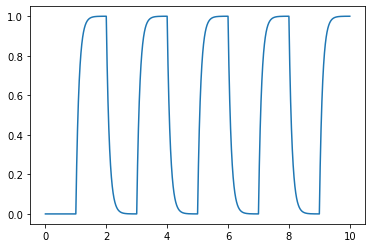

In [891]:
fig, ax = plt.subplots()
ax.plot(ts, pulses)

In [904]:
with nlif.Simulator(three_comp_lif_assm, dt=dt, ss=ss, record_voltages=True, record_spike_times=True) as sim:
    res = sim.simulate({
        gE2: 200e-9 * pulses,
        gI1: 30e-9 * pulses
    })

(0.5, 2.5)

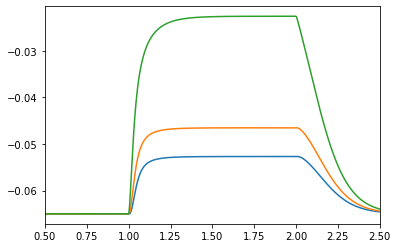

In [905]:
fig, ax = plt.subplots()
ax.plot(ts, res.v)
ax.set_xlim(0.5, 2.5)